這個是用房價來預測的模型
以下是上課內容程式碼跟簡介

In [ ]:
#import modules帶入模組
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

先帶入需要的模組

In [ ]:
#import data
df = pd.read_csv("https://raw.githubusercontent.com/ryanchung403/dataset/main/Housing_Dataset_Sample.csv")
print(df)

讀取需要的數據
並顯示數據的樣子

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     23086.800503  1.059034e+06   
1                             3.09     40173.072174  1.505891e+06   
2                             5.13     36882.159400  1.058988e+06   
3                             3.26     34310.242831  1.260617e+06   
4                             4.23     26354.109472  6.309435e+05   
...                            ...              ...           ...   
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1     188 Johnson Views Suite 079\nLake Kathleen, CA...  
2     9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                             USS Barnett\nFPO AP 44820  
4                            USNS Raymond\nFPO AE 09386  
...                                                 ...  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...  

[5000 rows x 7 columns]


In [ ]:
df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Avg. Area Income</th>
      <th>Avg. Area House Age</th>
      <th>Avg. Area Number of Rooms</th>
      <th>Avg. Area Number of Bedrooms</th>
      <th>Area Population</th>
      <th>Price</th>
      <th>Address</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>79545.458574</td>
      <td>5.682861</td>
      <td>7.009188</td>
      <td>4.09</td>
      <td>23086.800503</td>
      <td>1.059034e+06</td>
      <td>208 Michael Ferry Apt. 674\nLaurabury, NE 3701...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>79248.642455</td>
      <td>6.002900</td>
      <td>6.730821</td>
      <td>3.09</td>
      <td>40173.072174</td>
      <td>1.505891e+06</td>
      <td>188 Johnson Views Suite 079\nLake Kathleen, CA...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>61287.067179</td>
      <td>5.865890</td>
      <td>8.512727</td>
      <td>5.13</td>
      <td>36882.159400</td>
      <td>1.058988e+06</td>
      <td>9127 Elizabeth Stravenue\nDanieltown, WI 06482...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>63345.240046</td>
      <td>7.188236</td>
      <td>5.586729</td>
      <td>3.26</td>
      <td>34310.242831</td>
      <td>1.260617e+06</td>
      <td>USS Barnett\nFPO AP 44820</td>
    </tr>
    <tr>
      <th>4</th>
      <td>59982.197226</td>
      <td>5.040555</td>
      <td>7.839388</td>
      <td>4.23</td>
      <td>26354.109472</td>
      <td>6.309435e+05</td>
      <td>USNS Raymond\nFPO AE 09386</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
df.describe().T

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Avg. Area Income</th>
      <td>5000.0</td>
      <td>6.858311e+04</td>
      <td>10657.991214</td>
      <td>17796.631190</td>
      <td>61480.562388</td>
      <td>6.880429e+04</td>
      <td>7.578334e+04</td>
      <td>1.077017e+05</td>
    </tr>
    <tr>
      <th>Avg. Area House Age</th>
      <td>5000.0</td>
      <td>5.977222e+00</td>
      <td>0.991456</td>
      <td>2.644304</td>
      <td>5.322283</td>
      <td>5.970429e+00</td>
      <td>6.650808e+00</td>
      <td>9.519088e+00</td>
    </tr>
    <tr>
      <th>Avg. Area Number of Rooms</th>
      <td>5000.0</td>
      <td>6.987792e+00</td>
      <td>1.005833</td>
      <td>3.236194</td>
      <td>6.299250</td>
      <td>7.002902e+00</td>
      <td>7.665871e+00</td>
      <td>1.075959e+01</td>
    </tr>
    <tr>
      <th>Avg. Area Number of Bedrooms</th>
      <td>5000.0</td>
      <td>3.981330e+00</td>
      <td>1.234137</td>
      <td>2.000000</td>
      <td>3.140000</td>
      <td>4.050000e+00</td>
      <td>4.490000e+00</td>
      <td>6.500000e+00</td>
    </tr>
    <tr>
      <th>Area Population</th>
      <td>5000.0</td>
      <td>3.616352e+04</td>
      <td>9925.650114</td>
      <td>172.610686</td>
      <td>29403.928702</td>
      <td>3.619941e+04</td>
      <td>4.286129e+04</td>
      <td>6.962171e+04</td>
    </tr>
    <tr>
      <th>Price</th>
      <td>5000.0</td>
      <td>1.232073e+06</td>
      <td>353117.626581</td>
      <td>15938.657923</td>
      <td>997577.135049</td>
      <td>1.232669e+06</td>
      <td>1.471210e+06</td>
      <td>2.469066e+06</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
sns.displot(df['Price'])

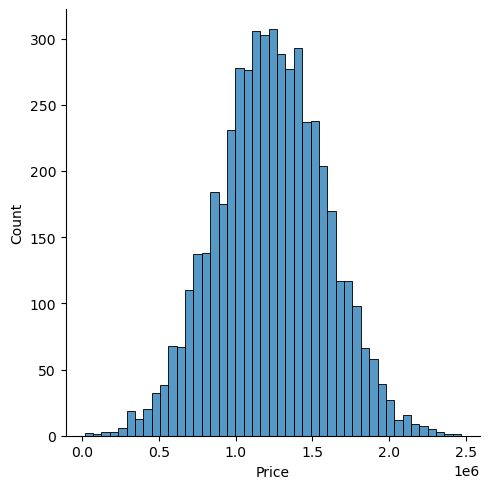

In [ ]:
print(df['Price'])

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64


In [ ]:
sns.jointplot(x=df['Avg. Area Income'],y=df['Price'])

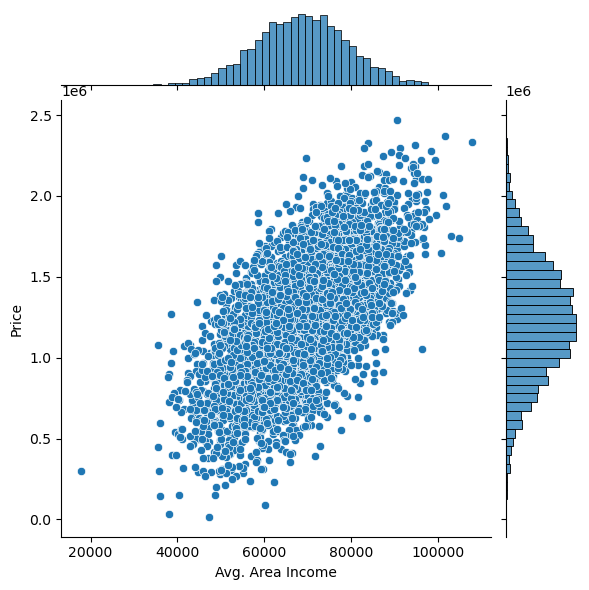

In [ ]:
sns.pairplot(df)

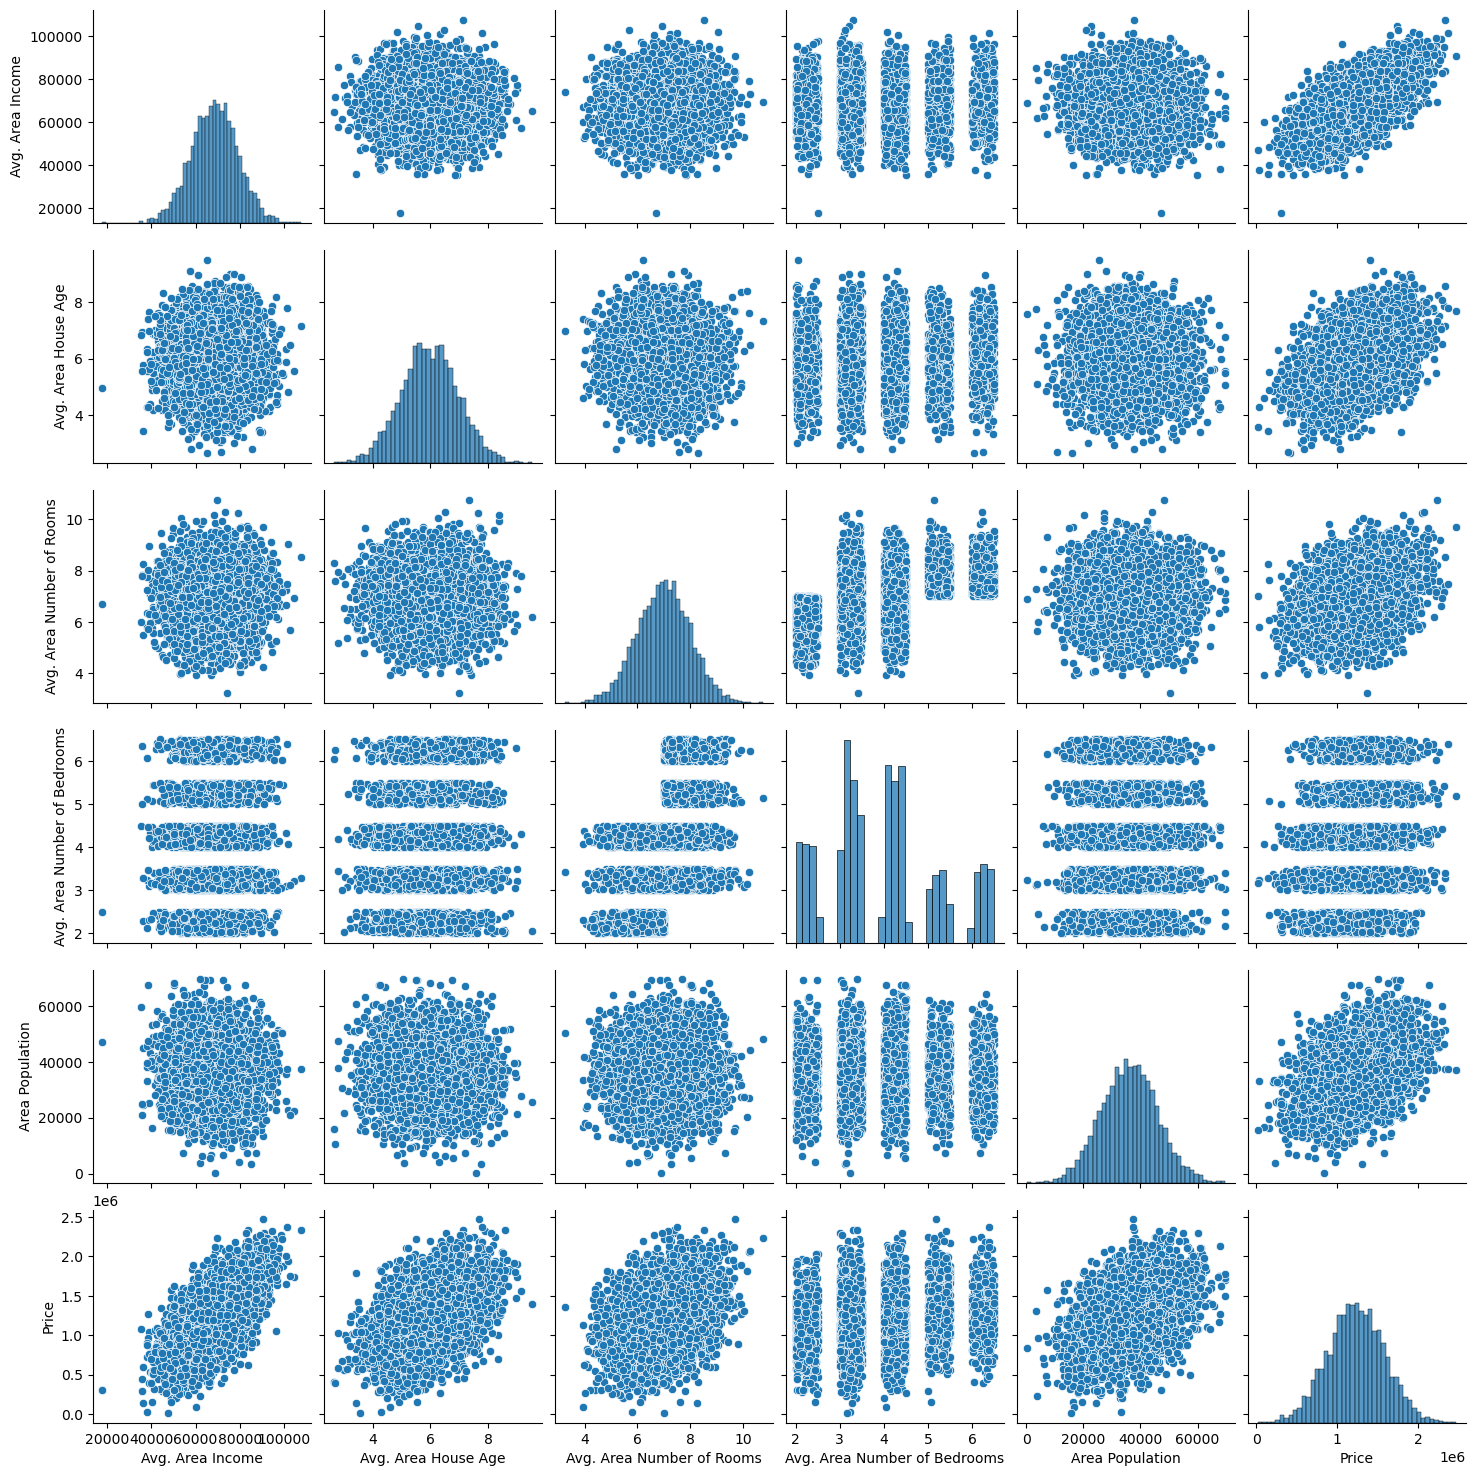

In [ ]:
X = df.iloc[:,:5]
y = df['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=54)
#using linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

#get the result
predictions = reg.predict(X_test)
print(predictions)

from sklearn.metrics import r2_score
r2_score(y_test,predictions)
plt.scatter(y_test,predictions, color='b',alpha=0.1)

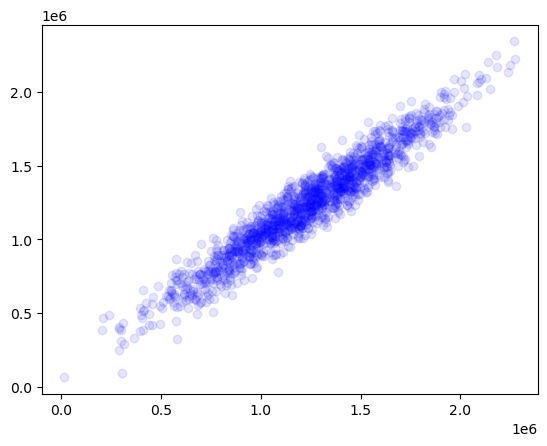